In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import Imputer


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline


In [3]:
# importing train and test csv

train = pd.read_csv(r"C:\Users\DIU\Desktop\ML-titanic\train.csv")
test = pd.read_csv(r"C:\Users\DIU\Desktop\ML-titanic\test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
# test data set have 11 columns
# Survived column is missing, which we have to find out through our Model

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# adding a Survived column and by default initialize with 0's

test.insert(loc=1, column = "Survived", value = 0)

In [8]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# concatenate both train and test datasets into one dataframe for data processing

full_data = pd.concat([train, test], ignore_index=True)

In [10]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# train.shape # 891 observations
# test.shape # 418 observations 

full_data.shape

(1309, 12)

## Features and Label
<hr>

#### Features
    * PassengerId
    * Pclass
    * Name
    * Sex
    * Age
    * SibSp (denotes that whether a passenger have any Sibling or Spouse in this journey)
    * Parch (denotes that whether a passenger have any Parent or Child in this journey)
    * Ticket
    * Fare
    * Cabin
    * Embarked (from which station the passenger was start the journey)
    
#### Label
    * Survived

## Data Cleanning and Processing
<hr>

### Working with `PassengerId` Feature:
`PassengerId` does not have any special meaning or does not make any effect to our data, so we can simply delete this feature.

In [12]:
del full_data["PassengerId"]

### Working with `Pclass` Feature:


First lets check whether it is contains any `NaN` or `empty/zero` values

In [13]:
print ("Is Pclass contains any NaN value ? : ", full_data["Pclass"].isna().any())
print ("No. of empty/zero values in Pclass ?: {0}". format(len(full_data.loc[full_data["Pclass"] == 0])))

Is Pclass contains any NaN value ? :  False
No. of empty/zero values in Pclass ?: 0


`Pclass` doesn't contain any `NaN` or `empty` values. So now lets explore this feature.

In [14]:
full_data["Pclass"].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [15]:
full_data.groupby("Pclass").count()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,323,323,323,284,323,323,323,323,256,321
2,277,277,277,261,277,277,277,277,23,277
3,709,709,709,501,709,709,709,708,16,709


>`Pclass` already in a decent form, so we can proceed to the next feature.

### Working with `Name` Feature:

First lets check whether the `Name` feature contains any `NaN` or `empty/zero` values.

In [16]:
print ("Is Name contains any NaN value ? : ", full_data["Name"].isna().any())
print ("No. of empty/zero values in Name ?: {0}". format(len(full_data.loc[full_data["Name"] == 0])))

Is Name contains any NaN value ? :  False
No. of empty/zero values in Name ?: 0


> `Name` doesn't contains any `empty` or `NaN` value.
Name contains `string` values, so we need to somehow convert it to `Numeric` values.
We do not need to the whole `name`, we can simply take the `title` from each `Name` which is more common and generic.

In [17]:
# function for finding Title from passenger's name

def find_title(name):
    title = re.search(' ([A-Za-z]+)\.', name)
    if title:
        return title.group(1)
    return ""

In [18]:
# find all Name title and store it into 'titles' List

titles = []
for name in full_data["Name"]:
    titles.append(find_title(name))

In [21]:
# adding 'titles' List into dataframe as a new Column called 'Title'

full_data["Title"] = np.asarray(titles)

In [22]:
full_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
# finding number of unique titles  

full_data["Title"].nunique()

18

In [24]:
# grouping the whole dataframe(full_data) by Title

full_data.groupby("Title").count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1
Col,4,4,4,4,4,4,4,4,4,3,4
Countess,1,1,1,1,1,1,1,1,1,1,1
Don,1,1,1,1,1,1,1,1,1,0,1
Dona,1,1,1,1,1,1,1,1,1,1,1
Dr,8,8,8,8,7,8,8,8,8,4,8
Jonkheer,1,1,1,1,1,1,1,1,1,0,1
Lady,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2


In [25]:
# We have Title now
# Name doesn't have any special meaning to our data right now !
# so we can safely delete this column from 'full_data'

del full_data["Name"]

In [26]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [27]:
# replace all less frequent and rare Title with 'Others'

full_data = full_data.replace(["Lady", "Countess","Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Others")

In [28]:
# now we only have 8 unique titles in our whole dataframe 

full_data["Title"].nunique()

8

In [29]:
full_data.groupby("Title").count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,
Master,61,61,61,53,61,61,61,61,9,61
Miss,260,260,260,210,260,260,260,260,58,259
Mlle,2,2,2,2,2,2,2,2,2,2
Mme,1,1,1,1,1,1,1,1,1,1
Mr,757,757,757,581,757,757,757,756,135,757
Mrs,197,197,197,170,197,197,197,197,76,196
Ms,2,2,2,1,2,2,2,2,0,2
Others,29,29,29,28,29,29,29,29,14,29


In [30]:
# Mlle, Mme are equivalent to Mrs

full_data = full_data.replace(["Mlle","Mme"], "Mrs")

In [31]:
full_data["Title"].nunique()

6

In [32]:
full_data.groupby("Title").count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,
Master,61,61,61,53,61,61,61,61,9,61
Miss,260,260,260,210,260,260,260,260,58,259
Mr,757,757,757,581,757,757,757,756,135,757
Mrs,200,200,200,173,200,200,200,200,79,199
Ms,2,2,2,1,2,2,2,2,0,2
Others,29,29,29,28,29,29,29,29,14,29


In [33]:
# Ms is equivalent to Miss

full_data = full_data.replace(["Ms"],"Miss")

In [34]:
full_data.groupby("Title").count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,
Master,61,61,61,53,61,61,61,61,9,61
Miss,262,262,262,211,262,262,262,262,58,261
Mr,757,757,757,581,757,757,757,756,135,757
Mrs,200,200,200,173,200,200,200,200,79,199
Others,29,29,29,28,29,29,29,29,14,29


In [35]:
full_data["Title"].nunique()

5

In [36]:
# mapping Title feature

title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}

full_data["Title"] = full_data["Title"].map(title_map)


In [37]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


In [38]:
full_data.groupby("Title").count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,
1,757,757,757,581,757,757,757,756,135,757
2,262,262,262,211,262,262,262,262,58,261
3,200,200,200,173,200,200,200,200,79,199
4,61,61,61,53,61,61,61,61,9,61
5,29,29,29,28,29,29,29,29,14,29


### Working with `Sex` Feature:

First lets check whether the `Sex` feature contains any `NaN` or `empty/zero` values.

In [39]:
print ("Is Sex contains any NaN value ? : ", full_data["Sex"].isna().any())
print ("No. of empty/zero values in Sex ?: {0}". format(len(full_data.loc[full_data["Sex"] == 0])))

Is Sex contains any NaN value ? :  False
No. of empty/zero values in Sex ?: 0


In [40]:
full_data.groupby("Sex").count()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
Sex,,,,,,,,,,
female,466,466,388,466,466,466,466,141,464,466
male,843,843,658,843,843,843,842,154,843,843


In [41]:
# Sex feature contain two types of value => Male and Female
# so we can simply map all the values with 0's and 1's

sex_map = {"male":1, "female":0}

In [42]:
full_data["Sex"] = full_data["Sex"].map(sex_map)

In [43]:
full_data.groupby("Sex").count()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
Sex,,,,,,,,,,
0,466,466,388,466,466,466,466,141,464,466
1,843,843,658,843,843,843,842,154,843,843


> `466` passengers are female and `843` passengers are male

### Working with `Age` Feature:

First lets check whether the `Age` feature contains any `NaN` or `empty/zero` values.

In [44]:
print ("Is Age contains any NaN value ? : ", full_data["Age"].isna().any())
print ("No. of empty/zero values in Age ?: {0}". format(len(full_data.loc[full_data["Age"] == 0])))

Is Age contains any NaN value ? :  True
No. of empty/zero values in Age ?: 0


In [45]:
# Age contains NaN value so firstly lets replace the NaN  values with `0`

full_data["Age"] = full_data["Age"].fillna(0)

In [46]:
print ("Is Age contains any NaN value ? : ", full_data["Age"].isna().any())
print ("No. of empty/zero values in Age ?: {0}". format(len(full_data.loc[full_data["Age"] == 0])))

Is Age contains any NaN value ? :  False
No. of empty/zero values in Age ?: 263


In [47]:
# So firstly we need to replace the missing values with some mean values/substitute values
# replacing missing values with substituted values known as Imputation
# for Imputation a library is already present in sklearn

subs_values = Imputer(missing_values = 0, strategy="mean", axis=0)
full_data["Age"] = subs_values.fit_transform(np.array(full_data["Age"]).reshape((len(full_data["Age"]), 1)))

In [48]:
full_data["Age"] = np.ceil(full_data["Age"])
full_data["Age"] = full_data["Age"].astype(np.int64)

In [49]:
print ("No. of empty/zero values in Age ?: {0}". format(len(full_data.loc[full_data["Age"] == 0])))

No. of empty/zero values in Age ?: 0


In [50]:
# mapping age by range

full_data.loc[full_data["Age"] <= 16, "Age"] = 0
full_data.loc[(full_data["Age"] > 16) & (full_data["Age"] <= 32), "Age"] = 1
full_data.loc[(full_data["Age"] > 32) & (full_data["Age"] <= 48), "Age"] = 2
full_data.loc[(full_data["Age"] > 48) & (full_data["Age"] <= 64), "Age"] = 3
full_data.loc[full_data["Age"] > 64, "Age"] = 4

In [51]:
full_data["Age"].head()

0    1
1    2
2    1
3    2
4    2
Name: Age, dtype: int64

In [52]:
full_data.groupby("Age").count()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
Age,,,,,,,,,,
0,134,134,134,134,134,134,134,20,134,134
1,787,787,787,787,787,787,787,112,787,787
2,269,269,269,269,269,269,269,96,268,269
3,106,106,106,106,106,106,105,60,105,106
4,13,13,13,13,13,13,13,7,13,13


> `Age` looks decent now, so we can step ahead. 

### Working with `SibSp` and `Parch` Feature:

First lets check whether these two feature contains any `NaN` or `empty/zero` values.

In [53]:
print ("Is SibSp contains any NaN values? : ", full_data["SibSp"].isna().any())
print ("Is Parch contains any NaN values? :", full_data["Parch"].isna().any())

Is SibSp contains any NaN values? :  False
Is Parch contains any NaN values? : False


In [54]:
full_data.groupby("SibSp").count()

,Survived,Pclass,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked,Title
SibSp,,,,,,,,,,
0,891,891,891,891,891,891,890,171,889,891
1,319,319,319,319,319,319,319,110,319,319
2,42,42,42,42,42,42,42,10,42,42
3,20,20,20,20,20,20,20,4,20,20
4,22,22,22,22,22,22,22,0,22,22
5,6,6,6,6,6,6,6,0,6,6
8,9,9,9,9,9,9,9,0,9,9


In [55]:
full_data.groupby("Parch").count()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Title
Parch,,,,,,,,,,
0,1002,1002,1002,1002,1002,1002,1001,205,1000,1002
1,170,170,170,170,170,170,170,56,170,170
2,113,113,113,113,113,113,113,29,113,113
3,8,8,8,8,8,8,8,3,8,8
4,6,6,6,6,6,6,6,2,6,6
5,6,6,6,6,6,6,6,0,6,6
6,2,2,2,2,2,2,2,0,2,2
9,2,2,2,2,2,2,2,0,2,2


> Both `SibSp` and `Parch` are in decent form, so we can proceed further.

### Working with `Ticket` Feature:

First lets check whether `Ticket` feature contains any `NaN` or `empty/zero` values.

In [56]:
print ("Is Ticket conatins any NaN values? : ", full_data["Ticket"].isna().any())
print ("No. of empty/zero values in Ticket ?: {0}". format(len(full_data.loc[full_data["Ticket"] == 0])))

Is Ticket conatins any NaN values? :  False
No. of empty/zero values in Ticket ?: 0


In [57]:
full_data["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [58]:
# according to the above result every passenger have ticket
# so we can simply ignore this feature

del full_data["Ticket"]


### Working with `Fare` Feature:

First lets check whether `Fare` feature contains any `NaN` or `empty/zero` values.

In [59]:
print ("Is Fare contains any NaN value ? : ", full_data["Fare"].isna().any())
print ("No. of empty/zero values in Fare ?: {0}". format(len(full_data.loc[full_data["Fare"] == 0])))

Is Fare contains any NaN value ? :  True
No. of empty/zero values in Fare ?: 17


In [60]:
# Fare contains NaN value so firstly lets replace the NaN  values with `0`

full_data["Fare"] = full_data["Fare"].fillna(0)

In [61]:
print ("Is Fare contains any NaN value ? : ", full_data["Fare"].isna().any())
print ("No. of empty/zero values in Fare ?: {0}". format(len(full_data.loc[full_data["Fare"] == 0])))

Is Fare contains any NaN value ? :  False
No. of empty/zero values in Fare ?: 18


In [62]:
# imputing Fare missing values

subs_values = Imputer(missing_values = 0, strategy="mean", axis=0)
full_data["Fare"] = subs_values.fit_transform(np.array(full_data["Fare"]).reshape((len(full_data["Fare"]), 1)))

In [63]:
full_data["Fare"] = np.ceil(full_data["Fare"])
full_data["Fare"] = full_data["Fare"].astype(np.int64)

In [64]:
# mapping `Fare` by range

full_data.loc[full_data["Fare"] <= 7, "Fare"] = 0
full_data.loc[(full_data["Fare"] > 7) & (full_data["Fare"] <= 14), "Fare"] = 1
full_data.loc[(full_data["Fare"] > 14) & (full_data["Fare"] <= 28), "Fare"] = 2
full_data.loc[(full_data["Fare"] > 28) & (full_data["Fare"] <= 42), "Fare"] = 3
full_data.loc[ full_data["Fare"] > 42, "Fare"] = 4

In [65]:
full_data.groupby("Fare").count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title
Fare,,,,,,,,,
0,20,20,20,20,20,20,1,20,20
1,605,605,605,605,605,605,27,605,605
2,298,298,298,298,298,298,36,298,298
3,127,127,127,127,127,127,44,127,127
4,259,259,259,259,259,259,187,257,259


### Working with `Cabin` Feature:

First lets check whether `Cabin` feature contains any `NaN` or `empty/zero` values.

In [66]:
print ("Is Cabin contains any NaN value ? : ", full_data["Cabin"].isna().any())
print ("No. of empty/zero values in Cabin ?: {0}". format(len(full_data.loc[full_data["Cabin"] == 0])))

Is Cabin contains any NaN value ? :  True
No. of empty/zero values in Cabin ?: 0


In [67]:
# Cabin contains NaN value so firstly lets replace the NaN  values with `0`

full_data["Cabin"] = full_data["Cabin"].fillna(0)

In [68]:
print ("Is Cabin contains any NaN value ? : ", full_data["Cabin"].isna().any())
print ("No. of empty/zero values in Cabin ?: {0}". format(len(full_data.loc[full_data["Cabin"] == 0])))

Is Cabin contains any NaN value ? :  False
No. of empty/zero values in Cabin ?: 1014


In [69]:
print ("Total number of passengers who have one or more cabin's: {0} ".format(len(full_data.loc[full_data["Cabin"] !=0 ])))

Total number of passengers who have one or more cabin's: 295 


In [70]:
# replace all the cabin's with 1

full_data.loc[full_data["Cabin"] !=0 , "Cabin"] = 1

In [71]:
full_data["Cabin"].head()

0    0
1    1
2    0
3    1
4    0
Name: Cabin, dtype: int64

> `Cabin` looks decent now, so we can step ahead. 

### Working with `Embarked` Feature:

First lets check whether `Embarked` feature contains any `NaN` or `empty/zero` values.

In [72]:
print ("Is Embarked contains any NaN value ? : ", full_data["Embarked"].isna().any())
print ("No. of empty/zero values in Embarked ?: {0}". format(len(full_data.loc[full_data["Embarked"] == 0])))

Is Embarked contains any NaN value ? :  True
No. of empty/zero values in Embarked ?: 0


In [73]:
# Embarked contains NaN value so firstly lets replace the NaN  values with 'S'
# `S` denotes Southampton, where the jouerney begins

full_data["Embarked"] = full_data["Embarked"].fillna("S")

In [74]:
print ("Is Embarked contains any NaN value ? : ", full_data["Embarked"].isna().any())
print ("No. of empty/zero values in Embarked ?: {0}". format(len(full_data.loc[full_data["Embarked"] == 0])))

Is Embarked contains any NaN value ? :  False
No. of empty/zero values in Embarked ?: 0


In [75]:
full_data.groupby("Embarked").count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title
Embarked,,,,,,,,,
C,270,270,270,270,270,270,270,270,270
Q,123,123,123,123,123,123,123,123,123
S,916,916,916,916,916,916,916,916,916


__Embarked feature denotes that from which station passengers are started their journey__

In Embarked feature it has three group `S`, `C`, and `Q`

`S` denotes `Southampton`

`C` denotes `Cherbourg`

`Q` denotes `Queenstown`


In [76]:
# Now we map the Embarked feature

embark_map = {"S" : 0, "C" : 1, "Q": 2}

full_data["Embarked"] = full_data["Embarked"].map(embark_map)

In [77]:
full_data.groupby("Embarked").count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title
Embarked,,,,,,,,,
0,916,916,916,916,916,916,916,916,916
1,270,270,270,270,270,270,270,270,270
2,123,123,123,123,123,123,123,123,123


In [78]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,1,1,1,0,1,0,0,1
1,1,1,0,2,1,0,4,1,1,3
2,1,3,0,1,0,0,1,0,0,2
3,1,1,0,2,1,0,4,1,0,3
4,0,3,1,2,0,0,1,0,0,1


> Every `features` looks good! so now we can start trainning our `Model`.
Before that first lets check is their `correlation` present between `features`.


In [79]:
full_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
Survived,1.000000,-0.244686,-0.404020,-0.036791,-0.014375,0.054908,0.212207,0.245239,0.048409,0.309278
Pclass,-0.244686,1.000000,0.124617,-0.391521,0.060832,0.018322,-0.700134,-0.713857,0.038875,-0.159077
Sex,-0.404020,0.124617,1.000000,0.042903,-0.109609,-0.213125,-0.198735,-0.137396,-0.120423,-0.523935
Age,-0.036791,-0.391521,0.042903,1.000000,-0.182925,-0.102688,0.187306,0.298491,-0.022260,-0.051002
SibSp,-0.014375,0.060832,-0.109609,-0.182925,1.000000,0.373587,0.345786,-0.009064,-0.073461,0.267262
Parch,0.054908,0.018322,-0.213125,-0.102688,0.373587,1.000000,0.321763,0.036806,-0.095523,0.308160
Fare,0.212207,-0.700134,-0.198735,0.187306,0.345786,0.321763,1.000000,0.598602,-0.014764,0.270296
Cabin,0.245239,-0.713857,-0.137396,0.298491,-0.009064,0.036806,0.598602,1.000000,0.032783,0.147342
Embarked,0.048409,0.038875,-0.120423,-0.022260,-0.073461,-0.095523,-0.014764,0.032783,1.000000,0.042509
Title,0.309278,-0.159077,-0.523935,-0.051002,0.267262,0.308160,0.270296,0.147342,0.042509,1.000000


## Visualize the correlation by heatmap:
<hr>

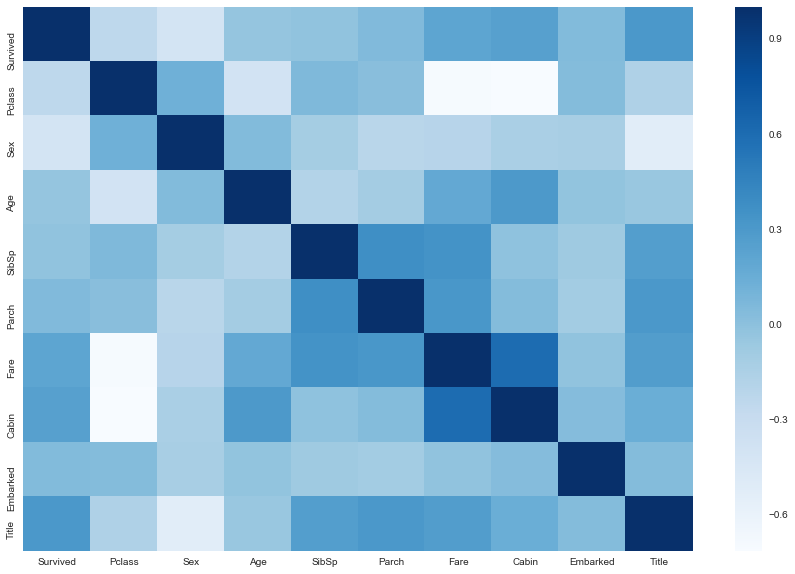

In [80]:
sns.set()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(full_data.corr(), cmap='Blues')

> accoring to the above result __no__ tow features are correlated. So now we can proceed to train our `Model`.

## Model Trainning
<hr>

In [81]:
# sliceing the process data into train and test

train = full_data.iloc[:891, :]
test = full_data.iloc[891:, :]

In [82]:
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
886,0,2,1,1,0,0,1,0,0,5
887,1,1,0,1,0,0,3,1,0,2
888,0,3,0,1,1,2,2,0,0,2
889,1,1,1,1,0,0,3,1,1,1
890,0,3,1,1,0,0,1,0,2,1


In [84]:
test.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
1304,0,3,1,1,0,0,1,0,0,1
1305,0,1,0,2,0,0,4,1,1,5
1306,0,3,1,2,0,0,1,0,0,1
1307,0,3,1,1,0,0,1,0,0,1
1308,0,3,1,1,1,1,2,0,1,4


### Train Model Using Naive Bayes Classifiers:
<hr>

In [85]:
# lets specify the features
features_train = train.iloc[: , 1:-1].values
labels_train = train.iloc[: , 0:1].values
features_test = test.iloc[: , 1:-1].values
labels_test = test.iloc[: , 0:1].values

clf = GaussianNB()
clf.fit(features_train, labels_train.ravel())

GaussianNB(priors=None)

In [86]:
pred_on_train_data = clf.predict(features_train)

In [87]:
acc_score = accuracy_score(pred_on_train_data, labels_train)

print ("Accuracy score in percentage : " , acc_score, "%")

Accuracy score in percentage :  0.7710437710437711 %


In [88]:
clf = BernoulliNB()
clf.fit(features_train, labels_train.ravel())
pred_on_train_data = clf.predict(features_train)

acc_score = accuracy_score(pred_on_train_data, labels_train)

print ("Accuracy score in percentage : " , acc_score, "%")

Accuracy score in percentage :  0.7878787878787878 %


In [89]:
clf = MultinomialNB()
clf.fit(features_train, labels_train.ravel())
pred_on_train_data = clf.predict(features_train)

acc_score = accuracy_score(pred_on_train_data, labels_train)

print ("Accuracy score in percentage : " , acc_score, "%")

Accuracy score in percentage :  0.7194163860830527 %


In [90]:
clf = SVC(kernel="rbf")

clf.fit(features_train, labels_train.ravel())
pred_on_train_data = clf.predict(features_train)

acc_score = accuracy_score(pred_on_train_data, labels_train)

print ("Accuracy score in percentage : " , acc_score, "%")

Accuracy score in percentage :  0.8271604938271605 %


In [91]:
clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train.ravel())
pred_on_train_data = clf.predict(features_train)

acc_score = accuracy_score(pred_on_train_data, labels_train)

print ("Accuracy score in percentage : " , acc_score, "%")

Accuracy score in percentage :  0.8900112233445566 %


In [92]:
clf = SVC(kernel="rbf")

clf.fit(features_train, labels_train.ravel())
pred_on_train_data = clf.predict(features_train)

acc_score = accuracy_score(pred_on_train_data, labels_train)

print ("Accuracy score in percentage : " , acc_score, "%")

Accuracy score in percentage :  0.8271604938271605 %


In [93]:
clf = RandomForestClassifier()

clf.fit(features_train, labels_train.ravel())
pred_on_train_data = clf.predict(features_train)

acc_score = accuracy_score(pred_on_train_data, labels_train)

print ("Accuracy score in percentage : " , acc_score, "%")

Accuracy score in percentage :  0.8855218855218855 %


In [94]:
pred_on_test_data = clf.predict(features_test)

In [95]:
import csv
file_name = "predict4.csv"
with open(file_name, 'w', newline='') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['PassengerId','Survived'])
    
    for i in range(len(test)):
        filewriter.writerow([test.index[i]+1, pred_on_test_data[i]])

># After submission the accuracy score 0.77990